In [2]:
import numpy as np
from matplotlib import pyplot as plt
import os  
import glob
import sys 
from importlib import reload

sys.path.append("/home/localadmin/Bureau/HUGO/repositories/gsp_neuro/gsp_neuro")
import data_loading as dload
reload(dload)
import plotting as plot

In [3]:
data_base_dir = "/home/localadmin/Bureau/HUGO/BIOPSYCHO_CTRLS/"
subject_ids_lut = "/home/localadmin/Bureau/HUGO/Ids.csv"

In [4]:
subject_ids = [sub.get('subjID') for sub in dload.get_ids_csv(subject_ids_lut)]

In [5]:
subject_folders = [subfolder for subfolder in glob.glob(data_base_dir + "sub-*") if subfolder[-8:] in subject_ids]

In [6]:
len(subject_folders)

66

In [7]:
len(subject_ids)

69

In [8]:
subjects_with_data = [folder[-8:] for folder in glob.glob(data_base_dir + "sub-*")]

print("These subjects were not found in the data directory : {}".format([sub for sub in subject_ids if sub not in subjects_with_data]))

These subjects were not found in the data directory : ['CHUVL340', 'CHUVL342', 'CHUVL364']


In [9]:
mysub_folder = subject_folders[2]
print("Current subject folder : " + mysub_folder)

Current subject folder : /home/localadmin/Bureau/HUGO/BIOPSYCHO_CTRLS/sub-CHUVL377


In [10]:
connectome_paths = dload.get_sub_connectomes_paths(mysub_folder)

In [20]:
A = dload.load_connectome(connectome_paths[2])

Succesfully loaded a connectome with 276 nodes.


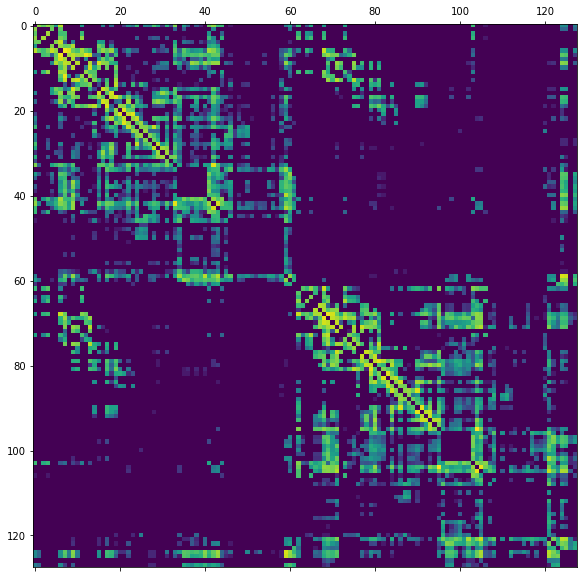

In [11]:
plt.figure(figsize=(10,10))
plt.matshow(np.log(A, out=np.zeros_like(A), where=(A!=0)), fignum=0)

In [12]:
import pygsp

In [13]:
G = pygsp.graphs.Graph(A)

Available algorithms for set coordinates:  
    community2D, random2D, random3D,
    ring2D, line1D, spring, laplacian_eigenmap2D, laplacian_eigenmap3D.
    Default is 'spring'.

In [14]:
G.is_connected()

False

In [34]:
np.where(np.sum(A,axis=0)==0)

(array([109]),)

In [31]:
G = G.extract_components()[0]

2022-12-08 10:11:20,321:[INFO](pygsp.graphs.graph.extract_components): Constructing subgraph for component of size 127.


In [32]:
G.set_coordinates(kind='laplacian_eigenmap2D')
f,a = plt.subplots(nrows=1, ncols=1,figsize=(10,10))
G.plot(ax=a)

AssertionError: 

In [33]:
G.compute_fourier_basis()

AssertionError: 